#### 2. Perform data preprocessing on movie_metadata.csv file. (You can download the dataset from the shared datasets folder on Google drive of your class.)

##### Perform the following operations on this dataset:
* Importing the libraries required for preprocessing from sklearn.
* Importing the Dataset from the above link.
* Use the necessary function to handling the missing data
* Perform data visualizations using matplotlib or seaborn libraries.
* Use the necessary function for handling of categorical data if any.
* Splitting the dataset into training and testing datasets
* Perform feature Scaling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/movie_metadata.csv")

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.sample(10))

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
689,Color,Roman Polanski,127.0,130.0,2000.0,25.0,Barney Clark,268.0,1987287.0,Crime|Drama,Ian McNeice,Oliver Twist,25474,450,Tony Noble,0.0,boy|character name in title|orphan|pickpocket|...,http://www.imdb.com/title/tt0380599/?ref_=fn_t...,138.0,English,UK,PG-13,50000000.0,2005.0,85.0,6.9,2.35,0
2780,Color,Bruce McCulloch,43.0,81.0,54.0,636.0,Elaine Hendrix,8000.0,30628981.0,Comedy|Romance,Will Ferrell,Superstar,15047,10792,Molly Shannon,1.0,dancing|orphan|school|special education|student,http://www.imdb.com/title/tt0167427/?ref_=fn_t...,160.0,English,USA,PG-13,14000000.0,1999.0,670.0,5.0,1.85,2000
3037,Color,Adam Shankman,80.0,101.0,163.0,488.0,Peter Coyote,683.0,41227069.0,Drama|Romance,Lauren German,A Walk to Remember,162701,2436,Paz de la Huerta,1.0,community service|love|punishment|school|student,http://www.imdb.com/title/tt0281358/?ref_=fn_t...,962.0,English,USA,PG,11000000.0,2002.0,548.0,7.4,2.35,19000
1443,Color,Luke Greenfield,128.0,112.0,42.0,196.0,Steve Howey,969.0,39026186.0,Comedy|Drama|Romance,Ashley Williams,Something Borrowed,48019,2371,Kirsten Day,4.0,best friend|crush|law school|lawyer|loud sex,http://www.imdb.com/title/tt0491152/?ref_=fn_t...,153.0,English,USA,PG-13,35000000.0,2011.0,826.0,5.9,1.85,13000
3047,Color,John Crowley,351.0,111.0,34.0,54.0,Fiona Glascott,838.0,38317535.0,Drama|Romance,Julie Walters,Brooklyn,73249,995,Eva Birthistle,1.0,1950s|immigrant|irish|irish accent|torn betwee...,http://www.imdb.com/title/tt2381111/?ref_=fn_t...,212.0,English,UK,PG-13,11000000.0,2015.0,55.0,7.5,1.85,36000
863,Color,Mark Waters,189.0,94.0,70.0,497.0,Ophelia Lovibond,1000.0,68218041.0,Comedy|Family|Fantasy,Madeline Carroll,Mr. Popper's Penguins,67191,2820,Philip Baker Hall,1.0,father|penguin|snowglobe|son|winter,http://www.imdb.com/title/tt1396218/?ref_=fn_t...,108.0,English,USA,PG,55000000.0,2011.0,549.0,6.0,1.85,14000
2609,Color,NaN,20.0,45.0,NaN,260.0,Bobby Campo,460.0,NaN,Crime|Drama|Horror|Mystery|Thriller,Bex Taylor-Klaus,Scream: The TV Series,18058,2380,Jason Wiles,0.0,generation y|millennial generation|murder|teen...,http://www.imdb.com/title/tt3921180/?ref_=fn_t...,68.0,English,USA,TV-14,NaN,NaN,292.0,7.3,16.00,0
1151,Color,Sydney Pollack,56.0,154.0,521.0,957.0,Holly Hunter,10000.0,158348400.0,Drama|Mystery|Thriller,Tom Cruise,The Firm,88844,14244,Wilford Brimley,0.0,bar|fbi|law|law firm|lawyer,http://www.imdb.com/title/tt0106918/?ref_=fn_t...,142.0,English,USA,R,42000000.0,1993.0,1000.0,6.8,1.85,0
3354,Color,Serdar Akar,16.0,122.0,11.0,173.0,Bergüzar Korel,205.0,NaN,Action|Adventure,Necati Sasmaz,Valley of the Wolves: Iraq,14486,808,Ghassan Massoud,3.0,abu ghraib|bomb|christian|explosion|iraq,http://www.imdb.com/title/tt0493264/?ref_=fn_t...,159.0,Arabic,Turkey,NaN,8300000.0,2006.0,197.0,6.0,1.85,467
1135,Color,Oliver Parker,152.0,101.0,32.0,104.0,Tim McInnerny,219.0,8129455.0,Action|Adventure|Comedy|Crime,Daniel Kaluuya,Johnny English Reborn,89568,661,Togo Igawa,1.0,assassin|chinese|conspiracy|gadget|premier,http://www.imdb.com/title/tt1634122/?ref_=fn_t...,142.0,English,USA,PG,45000000.0,2011.0,141.0,6.3,2.35,17000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
data.shape

(5043, 28)

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
data.shape

(4998, 28)

In [8]:
(data.isnull().sum().sort_values(ascending=False))/data.shape[0]*100

gross                        17.486995
budget                        9.743898
aspect_ratio                  6.542617
content_rating                6.022409
plot_keywords                 3.041216
title_year                    2.140856
director_name                 2.060824
director_facebook_likes       2.060824
num_critic_for_reviews        0.980392
actor_3_name                  0.460184
actor_3_facebook_likes        0.460184
num_user_for_reviews          0.420168
color                         0.380152
duration                      0.300120
facenumber_in_poster          0.260104
actor_2_name                  0.260104
actor_2_facebook_likes        0.260104
language                      0.240096
actor_1_name                  0.140056
actor_1_facebook_likes        0.140056
country                       0.100040
movie_facebook_likes          0.000000
genres                        0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link          

In [9]:
data = data.dropna(thresh=int(data.shape[0]*0.9), axis=1) # Droppping feature based on missing values
data = data.drop(columns=['movie_imdb_link', 'movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'aspect_ratio'])
print(data.shape)

(4998, 20)


In [10]:
print(data['genres'].nunique())
# data['genres'].unique()

914


In [11]:
data['genres'] = data['genres'].str.split('|').str[0]

In [12]:
print(data['genres'].nunique())
data['genres'].unique()

21


array(['Action', 'Documentary', 'Adventure', 'Drama', 'Animation',
       'Comedy', 'Mystery', 'Fantasy', 'Crime', 'Biography', 'Sci-Fi',
       'Horror', 'Romance', 'Thriller', 'Game-Show', 'Family', 'Music',
       'Western', 'Musical', 'Film-Noir', 'History'], dtype=object)

In [13]:
print(data['plot_keywords'].nunique())
data['plot_keywords'].head()

4760


0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [14]:
data['plot_keywords'] = data['plot_keywords'].str.split('|').str[0]

In [15]:
data['plot_keywords'].value_counts()

alien            79
death            50
boy              41
best friend      39
actor            32
                 ..
mumbai riots      1
boy genius        1
cartoon tiger     1
nudity            1
adolescence       1
Name: plot_keywords, Length: 2063, dtype: int64

2063, this is still a huge number. We will set all plot_keyords other than top 20 to 'others' 

In [16]:
not_top20 = data['plot_keywords'].value_counts()[20:]
not_top20.index

Index(['army', 'breasts', '1970s', 'basketball', 'cia', 'christmas', 'captain',
       'based on novel', 'blood splatter', 'dog',
       ...
       'hijack', 'ballistics', 'camcorder', 'documentary crew',
       'baltimore orioles', 'mumbai riots', 'boy genius', 'cartoon tiger',
       'nudity', 'adolescence'],
      dtype='object', length=2043)

In [17]:
data = data.replace(not_top20.index, value='Others')

In [18]:
data['plot_keywords'].unique()

array(['Others', nan, 'alien', 'blood', 'box office flop', 'death',
       'battle', 'best friend', 'college', 'boy', '1980s', 'beach',
       'assassin', 'friend', 'baby', 'apartment', 'bank', '1960s',
       '1950s', 'actor', 'african american', 'bar'], dtype=object)

In [19]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
all_feature = list(numeric_features) + list(categorical_features)
print(categorical_features)

Index(['color', 'genres', 'plot_keywords', 'language', 'country',
       'content_rating'],
      dtype='object')


In [20]:
print("plot_keywords: ",data['plot_keywords'].nunique())
print("color: ",data['color'].nunique())
print("genres: ",data['genres'].nunique())
print("language: ",data['language'].nunique())
print("country: ",data['country'].nunique())
print("content_rating: ",data['content_rating'].nunique())

plot_keywords:  21
color:  2
genres:  21
language:  47
country:  65
content_rating:  18


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_transformer = Pipeline(steps=[
    ('simputer', SimpleImputer(strategy='most_frequent')),
    ('int_enc', OrdinalEncoder())])

cat_preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)])

transformed_cat = pd.DataFrame(cat_preprocessor.fit_transform(data), columns=categorical_features)


In [22]:
# Helper function to map data
def map_columns(main_df, derived_df):
    for i in derived_df.columns:
        main_df[i] = derived_df[i]


In [23]:
map_columns(data, transformed_cat)
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,1.0,723.0,178.0,0.0,855.0,1000.0,0.0,886204,4834,0.0,3.0,3054.0,11.0,62.0,7.0,237000000.0,2009.0,936.0,7.9,33000
1,1.0,302.0,169.0,563.0,1000.0,40000.0,0.0,471220,48350,0.0,3.0,1238.0,11.0,62.0,7.0,300000000.0,2007.0,5000.0,7.1,0
2,1.0,602.0,148.0,0.0,161.0,11000.0,0.0,275868,11700,1.0,3.0,994.0,11.0,61.0,7.0,245000000.0,2015.0,393.0,6.8,85000
3,1.0,813.0,164.0,22000.0,23000.0,27000.0,0.0,1144337,106759,0.0,3.0,2701.0,11.0,62.0,7.0,250000000.0,2012.0,23000.0,8.5,164000
4,1.0,NaN,NaN,131.0,NaN,131.0,6.0,8,143,0.0,3.0,NaN,11.0,62.0,9.0,NaN,NaN,12.0,7.1,0


In [24]:
data.describe()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,4953.000000,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4953.000000,4.998000e+03,4998.000000,4985.000000,4953.000000,4977.000000,4953.000000,4953.000000,4953.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4998.000000
mean,0.958813,139.890079,107.213325,688.679060,639.900905,6556.939892,4.140521,8.347020e+04,9676.941176,1.368907,3.929336,272.014667,11.685645,55.870987,7.752069,3.974787e+07,2002.468820,1642.998796,6.441056,7487.430172
std,0.198743,121.477586,25.248775,2821.649616,1643.298282,15061.586700,3.717242,1.380866e+05,18165.404578,2.014623,3.242403,377.776210,3.862059,15.217145,2.129564,2.069689e+08,12.475235,4030.925303,1.124107,19290.726563
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,0.000000
25%,1.000000,50.000000,93.000000,7.000000,133.000000,611.500000,1.000000,8.560000e+03,1405.500000,0.000000,3.000000,64.000000,11.000000,62.000000,7.000000,6.000000e+06,1999.000000,280.000000,5.800000,0.000000
50%,1.000000,110.000000,103.000000,49.000000,369.000000,984.000000,4.000000,3.426050e+04,3085.500000,1.000000,3.000000,156.000000,11.000000,62.000000,9.000000,2.000000e+07,2005.000000,595.000000,6.600000,162.500000
75%,1.000000,195.000000,118.000000,192.000000,635.000000,11000.000000,7.000000,9.612075e+04,13740.500000,2.000000,3.000000,324.000000,11.000000,62.000000,9.000000,4.500000e+07,2011.000000,917.000000,7.200000,3000.000000
max,1.000000,813.000000,511.000000,23000.000000,23000.000000,640000.000000,20.000000,1.689764e+06,656730.000000,43.000000,20.000000,5060.000000,46.000000,64.000000,17.000000,1.221550e+10,2016.000000,137000.000000,9.500000,349000.000000


In [25]:
print(numeric_features)
# data[numeric_features]

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')


In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('iter_imp', IterativeImputer(random_state=1)),
    ('std_scaler', StandardScaler())])

num_preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

transformed_num = pd.DataFrame(num_preprocessor.fit_transform(data), columns=numeric_features)

In [27]:
map_columns(data, transformed_num)
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,1.0,4.824003,2.808439,-0.243943,0.132505,-0.368262,0.0,5.813847,-0.266629,-0.680477,3.0,7.376811,11.0,62.0,7.0,1.007158,0.535941,-0.174762,1.297998,1.322663
1,1.0,1.343781,2.451479,-0.042358,0.220928,2.222467,0.0,2.808301,2.129153,-0.680477,3.0,2.563131,11.0,62.0,7.0,1.327568,0.374432,0.834621,0.586251,-0.388175
2,1.0,3.823749,1.618572,-0.243943,-0.290704,0.296027,0.0,1.393452,0.111380,-0.183413,3.0,1.916359,11.0,61.0,7.0,1.047845,1.020467,-0.309627,0.319346,4.018528
3,1.0,5.567993,2.253168,7.633274,13.636781,1.358890,0.0,7.683390,5.344873,-0.680477,3.0,6.441112,11.0,62.0,7.0,1.073275,0.778204,5.305311,1.831809,8.114170
4,1.0,-0.370481,-0.087039,-0.197038,-0.518712,-0.425989,6.0,-0.604480,-0.524893,-0.680477,3.0,-0.455079,11.0,62.0,9.0,-0.049362,-0.296711,-0.404257,0.586251,-0.388175


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4953 non-null   float64
 1   num_critic_for_reviews     4953 non-null   float64
 2   duration                   4953 non-null   float64
 3   director_facebook_likes    4953 non-null   float64
 4   actor_3_facebook_likes     4953 non-null   float64
 5   actor_1_facebook_likes     4953 non-null   float64
 6   genres                     4953 non-null   float64
 7   num_voted_users            4953 non-null   float64
 8   cast_total_facebook_likes  4953 non-null   float64
 9   facenumber_in_poster       4953 non-null   float64
 10  plot_keywords              4953 non-null   float64
 11  num_user_for_reviews       4953 non-null   float64
 12  language                   4953 non-null   float64
 13  country                    4953 non-null   float

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
display(data_train)
display(data_test)

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1243,1.0,0.293928,-0.483525,-0.233202,0.016031,-0.381614,4.0,-0.015472,-0.379327,1.307781,3.0,0.052913,11.0,62.0,7.0,-0.006112,0.374432,-0.235861,0.052441,-0.388175
1065,1.0,1.806709,-0.364538,-0.201693,-0.048609,0.495314,0.0,1.124051,0.370690,-0.680477,3.0,0.503533,11.0,19.0,7.0,0.030671,0.778204,-0.175010,-0.125496,2.877970
1697,1.0,0.442726,1.063301,-0.239647,-0.188256,-0.375503,4.0,-0.451821,-0.429648,0.313652,3.0,-0.487830,11.0,10.0,9.0,-0.037806,0.616696,-0.292987,0.764188,-0.388175
189,1.0,0.880854,-0.681836,-0.226040,-0.146788,-0.168975,0.0,0.223193,-0.254957,-0.680477,3.0,-0.355295,11.0,62.0,6.0,0.462970,0.697450,-0.297457,0.230378,0.441322
3866,1.0,-0.772458,-0.840485,-0.243227,-0.050438,-0.387726,4.0,-0.584215,-0.387751,-0.680477,3.0,-0.689284,11.0,62.0,9.0,-0.175306,0.858959,-0.253495,-1.904863,-0.388175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,1.0,-0.780725,-0.404201,-0.242511,0.114821,-0.368262,4.0,-0.561604,-0.257160,1.804845,3.0,-0.588557,11.0,62.0,7.0,-0.137162,0.132169,-0.158866,-1.904863,-0.375577
2785,1.0,-0.987389,1.261612,-0.196322,-0.385834,-0.406592,3.0,-0.586960,-0.508211,-0.183413,3.0,-0.646873,11.0,19.0,7.0,-0.126991,-0.594620,-0.403512,-0.659306,-0.381591
914,1.0,0.128597,0.349381,-0.207780,-0.340708,-0.375636,4.0,0.741695,-0.438567,-0.183413,3.0,0.556547,11.0,62.0,9.0,0.061187,-0.190848,-0.252254,0.052441,-0.388175
4011,1.0,-0.144199,-0.324876,-0.241795,-0.270580,-0.379688,7.0,-0.392773,-0.426179,-0.680477,7.0,-0.532892,11.0,62.0,7.0,-0.033556,0.535941,-0.310373,0.675220,-0.388175


,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
5039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4453,1.0,1.128851,-0.126565,-0.136169,-0.345587,0.761030,7.0,0.405263,0.689129,-0.680477,6.0,1.131750,11.0,62.0,7.0,0.208677,0.455187,0.586249,-0.837243,-0.388175
3022,1.0,-0.722859,-0.285214,-0.113253,-0.251676,-0.406459,13.0,-0.566971,-0.441319,-0.680477,6.0,-0.548797,11.0,62.0,6.0,-0.137162,-1.321409,-0.309379,-0.837243,-0.341412
3524,1.0,-0.706326,-0.761161,-0.240005,-0.135812,-0.368262,0.0,-0.567362,-0.382575,3.296039,3.0,-0.636270,11.0,29.0,9.0,-0.045657,0.535941,-0.303418,-0.036527,-0.353803
2276,1.0,0.293928,-0.245552,-0.224966,-0.035193,0.495314,4.0,-0.160134,0.399098,-0.183413,3.0,-0.376501,11.0,62.0,9.0,-0.096475,1.020467,-0.158866,0.141410,0.907914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1.0,-0.003668,0.627017,-0.184864,0.064816,0.362456,0.0,1.027080,0.312992,2.301910,3.0,0.180147,11.0,62.0,9.0,0.183247,-0.433111,-0.189167,0.319346,-0.388175
930,1.0,1.575245,0.190732,-0.209212,-0.032754,0.694601,0.0,1.265389,0.536847,0.313652,18.0,0.135085,11.0,62.0,9.0,0.056101,0.939713,-0.178736,0.586251,0.856071
4037,1.0,-0.598860,0.508030,4.410776,-0.135202,-0.375104,4.0,-0.493777,-0.378006,-0.183413,4.0,-0.424213,11.0,62.0,6.0,-0.175355,-2.128953,-0.197612,0.319346,-0.356602
1252,1.0,-0.408729,-0.205890,-0.241795,-0.032754,-0.387460,4.0,-0.387493,-0.372390,-0.183413,3.0,-0.408309,11.0,61.0,7.0,0.005242,-0.271603,-0.237600,-0.570338,-0.365105


AxesSubplot(0.125,0.125;0.62x0.755)


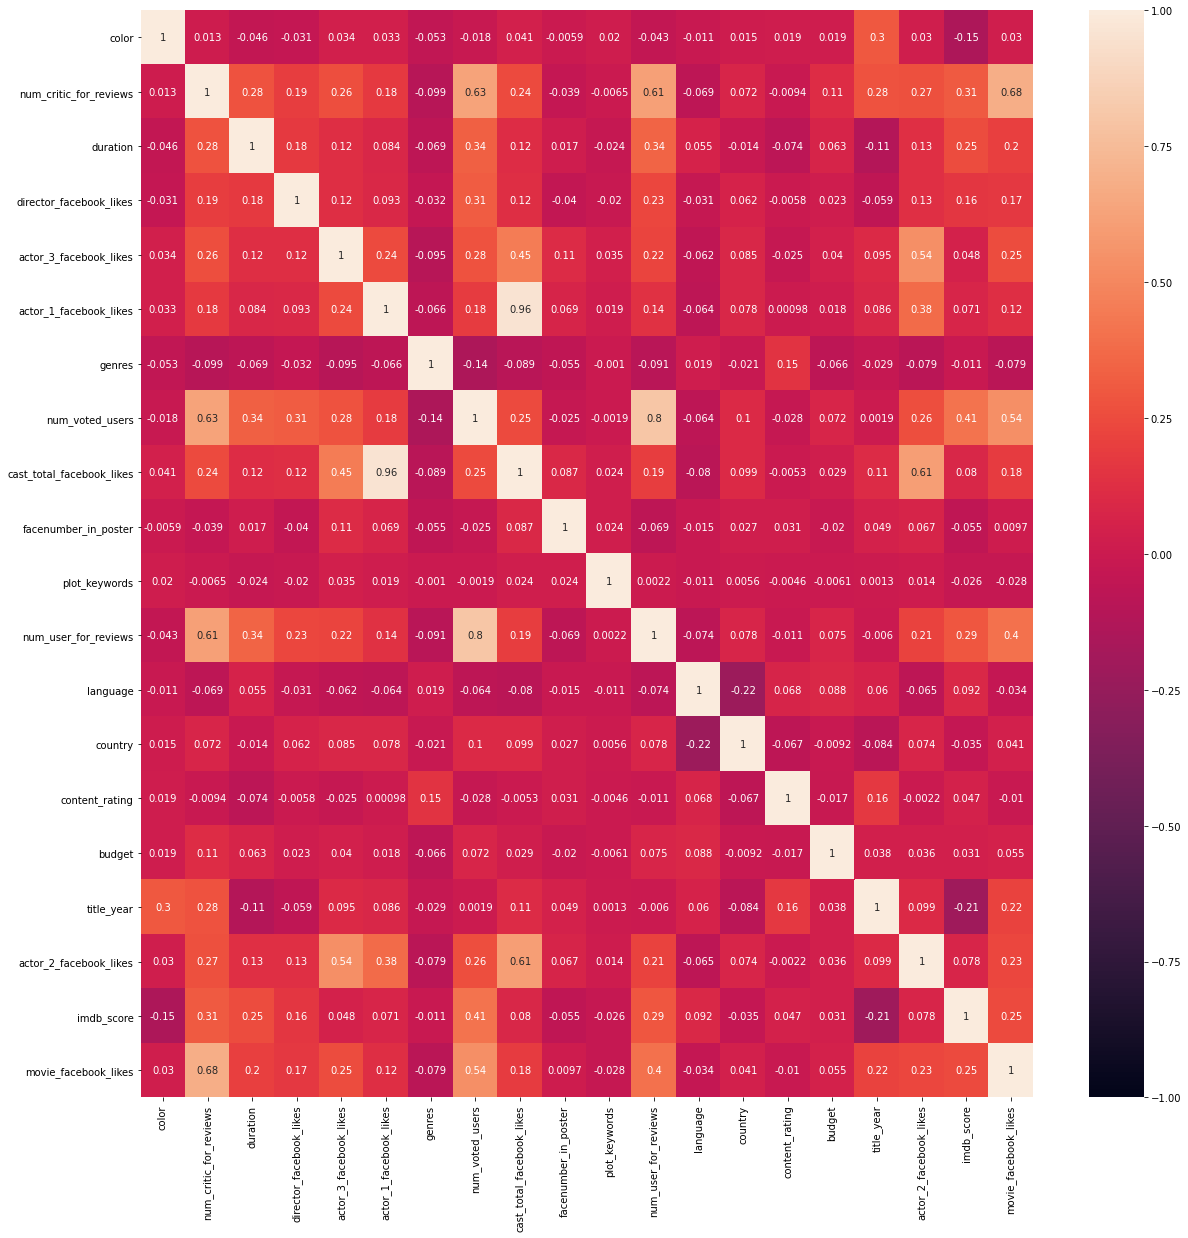

In [30]:
corr_matrix = data_train.corr()
plt.figure(figsize=(20,20))
print(sns.heatmap(corr_matrix, annot=True, vmin=-1))